In [29]:
# Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import openweathermapy as ow
import pymsgbox
from config import api_key
from adjustText import adjust_text


In [2]:
min_amount = pymsgbox.prompt('Enter the Min Amount in your Range for one day per person')
max_amount = pymsgbox.prompt('Enter the Max Amount in your Range for one day per person')

if((not min_amount.isnumeric()) or (not max_amount.isnumeric())):
    pymsgbox.alert("Enter a numeric value")

In [3]:
area_int=pymsgbox.prompt("Please enter the area of your interests(all,dining,shopping,museums,sports,spas):")
int_type=''    
    
if area_int== "all":
    int_type=pymsgbox.prompt("Please enter place type (hotel,amusement_park,bar,cafe,casino,museum,night_club,restaurant,shopping_mall,spa,stadium,zoo): ")
elif area_int== "dining":
    int_type=pymsgbox.prompt("Please enter place type (bar,cafe,casino,night_club,restaurant): ")
elif area_int== "shopping":
    int_type=pymsgbox.prompt("Please enter place type (shopping_mall): ")
elif area_int== "museums":
    int_type=pymsgbox.prompt("Please enter place type (museum,zoo): ")
elif area_int=="sports":
    int_type=pymsgbox.prompt("Please enter place type (amusement_park,stadium): ")
elif area_int=="spas":
    int_type=pymsgbox.prompt("Please enter place type (spas): ")  
    
#     put error handling for if user enter invalid data 

In [4]:
city_interest = pd.read_csv("Output/city_interest_rating_summary.csv")
city_interest=city_interest.sort_values(by=['city_sort','Average of Ratings','Total Rating Counts'], ascending=False)
# city_interest.head()
    

,Total Rating Counts,Average of Ratings,Max Number of Reviews,Average Number of Reviews,city_sort,interest_sort
1285,20,4.62,1105.0,488.00,"Wichita, KS",restaurant
1289,3,4.57,4064.0,1430.67,"Wichita, KS",zoo
1280,20,4.56,710.0,292.65,"Wichita, KS",cafe
1287,20,4.46,172.0,61.20,"Wichita, KS",spa
1279,20,4.39,1056.0,394.75,"Wichita, KS",bar


In [6]:
city=[]
rating=[]
count=[]
review = []
for index,row in city_interest.iterrows():
        if(int_type==row[5]):
                city.append(row[4])
                rating.append(row[1])
                count.append(row[0])
                review.append(row[3])

In [7]:
final_interest_df=pd.DataFrame({"CityState": city,"Rating": rating,"Count" : count,"Avg Number of Reviews" : review})
# final_interest_df

In [8]:
city_temp_cost = pd.read_csv("CSV_Data_Files/CityTravelCost.csv")
interest_cost_merge=pd.merge(final_interest_df,city_temp_cost,on='CityState',how='inner')
# interest_cost_merge.head()

In [9]:
cityState=[]
amount=[]
count=[]
rating=[]
review = []
for index, row in interest_cost_merge.iterrows():
    if((int(row[6]) >= int(min_amount)) and (int(row[6]) <= int(max_amount))):
        cityState.append(row[0])
        amount.append(row[6])
        count.append(row[2])
        rating.append(row[1])
        review.append(row[3])


In [10]:
city_travel_df = pd.DataFrame({
    'CityState': cityState,
    'AvgAmt': amount,
    'Cnt': count,
    'Rating':rating,
    'Review':review
    },index=cityState)

if(len(city_travel_df) < 1):
    print("Please Broaden your search Criterea")
city_travel_df=city_travel_df.nlargest(5, ['Rating','Cnt'],keep='first')
    
premium_interest_city=city_travel_df.sort_values(by=['AvgAmt'], ascending=False)
budget_interest_city=city_travel_df.sort_values(by=['AvgAmt'], ascending=True)

city_travel_df

,CityState,AvgAmt,Cnt,Rating,Review
"Long Beach, CA","Long Beach, CA",269,20,4.62,940.5
"Indianapolis, IN","Indianapolis, IN",210,20,4.61,1070.4
"Detroit, MI","Detroit, MI",312,20,4.61,1334.7
"Boston, MA","Boston, MA",212,20,4.61,2133.6
"Charlotte, NC","Charlotte, NC",218,20,4.56,561.8


In [11]:
settings = {"units": "metric", "appid": api_key}

In [12]:
# Get data for each city in cities.csv
weather_data = []
summary = ["name", "main.temp"]
weather_df = pd.DataFrame()
for index,row in city_travel_df.iterrows():
    try:
        cityName=row[0].split(',')
        weather_data=ow.get_current(cityName[0], **settings)
        data = weather_data(*summary)
        weather_df=weather_df.append({'State/Cities': data[0], 'Current Temp': data[1]}, ignore_index=True)
    except:
        print("record not found " + row[0] )

In [13]:
weather_df

,Current Temp,State/Cities
0,26.99,Long Beach
1,27.97,Indianapolis
2,22.42,Detroit
3,22.84,Boston
4,27.20,Charlotte


In [14]:
#NAME VARIABLES FOR PLOTTING FROM 
weather = weather_df["Current Temp"]

interest_rating = city_travel_df["Rating"]
city_cost = city_travel_df["AvgAmt"]
rating_count = city_travel_df["Cnt"]
avg_reviews = city_travel_df["Review"]

#THIS VARIABLE IS FOR LABELING THE POINTS
cities = city_travel_df["CityState"]  
    

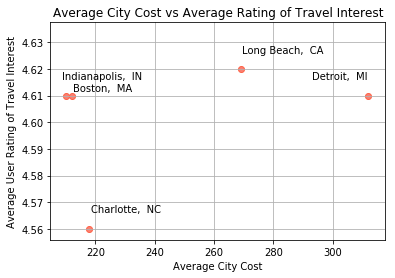

In [33]:
#SCATTER PLOT 1 - COST vs RATING

#Add Labels
texts=[]
for i,type in enumerate(cities):
    x = city_cost[i]
    y = interest_rating[i]
    plt.scatter(x, y, marker="o", facecolors="salmon", edgecolors="tomato")
    texts.append(plt.text(x+0.1, y+0.005, type, fontsize=10))

adjust_text(texts)

#Title & Grid
plt.title("Average City Cost vs Average Rating of Travel Interest")
plt.xlabel("Average City Cost")
plt.ylabel("Average User Rating of Travel Interest")
plt.grid(True)
plt.show()

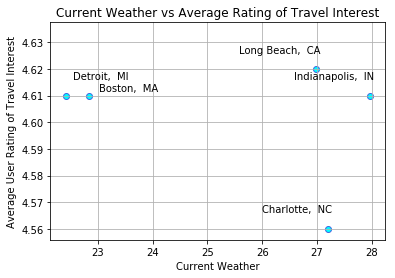

In [34]:
#SCATTER PLOT 2 - WEATHER vs RATING
cityText=[]
#Add Labels throguh Loop
for i,type in enumerate(cities):
    x = weather[i]
    y = interest_rating[i]
    plt.scatter(x, y, marker="o", facecolors="aqua", edgecolors="royalblue")
    cityText.append(plt.text(x+0.1, y+0.005, type, fontsize=10))

adjust_text(cityText)

#Title & Grid
plt.title("Current Weather vs Average Rating of Travel Interest")
plt.xlabel("Current Weather")
plt.ylabel("Average User Rating of Travel Interest")
plt.grid(True)
plt.show()

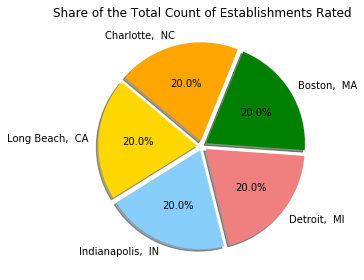

In [35]:
#PIE CHART - COUNT OF USER RATINGS

colors = ["gold","lightskyblue", "lightcoral", "green", "orange"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(rating_count, colors=colors, explode=explode, labels=cities, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Share of the Total Count of Establishments Rated")

plt.tight_layout()

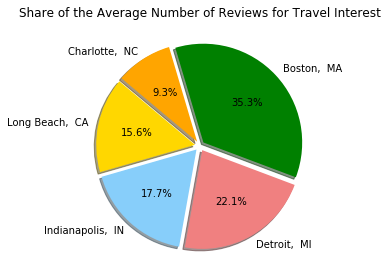

In [36]:
#PIE CHART - Average of the Number of Reviews

colors = ["gold","lightskyblue", "lightcoral", "green", "orange"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(avg_reviews, colors=colors, explode=explode, labels=cities, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Share of the Average Number of Reviews for Travel Interest")

plt.tight_layout()

Text(0, 0.5, 'Cost')

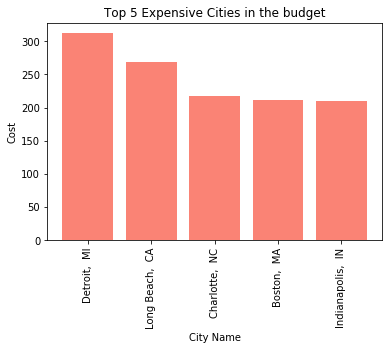

In [37]:
premium_interest_city=premium_interest_city.iloc[:5,:2]
for row in premium_interest_city.iterrows():
    plt.bar(premium_interest_city['CityState'], premium_interest_city['AvgAmt'], color='salmon', alpha=0.5, align="center") 
    plt.xticks(rotation=90)

# Give our chart some labels and a tile
plt.title("Top 5 Expensive Cities in the budget")
plt.xlabel("City Name")
plt.ylabel("Cost")    

Text(0, 0.5, 'Cost')

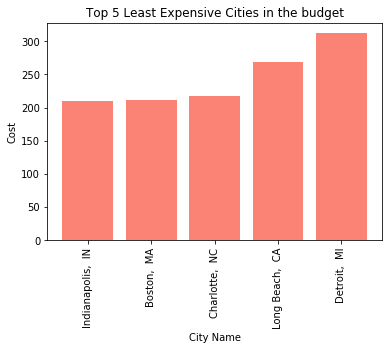

In [38]:
budget_interest_city=budget_interest_city.iloc[:5,:2]
for row in budget_interest_city.iterrows():
    plt.bar(budget_interest_city['CityState'], budget_interest_city['AvgAmt'], color='salmon', alpha=0.5, align="center") 
    plt.xticks(rotation=90)

# Give our chart some labels and a tile
plt.title("Top 5 Least Expensive Cities in the budget")
plt.xlabel("City Name")
plt.ylabel("Cost")   